In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [8]:
df['Country'].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [9]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

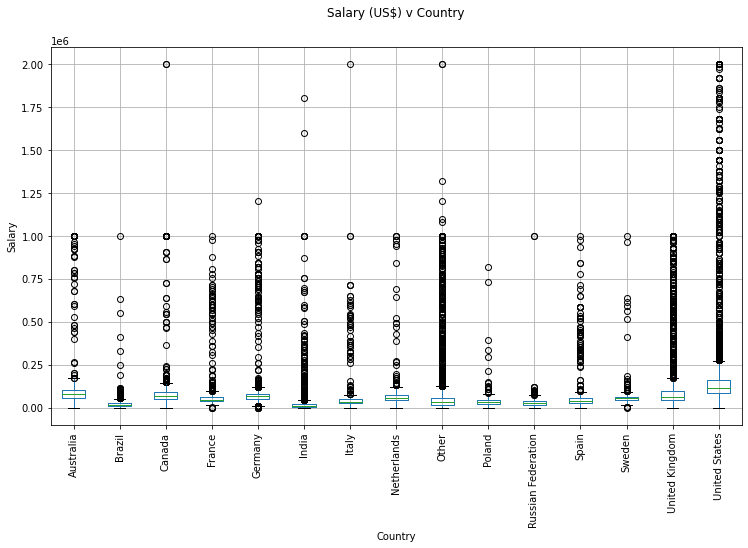

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

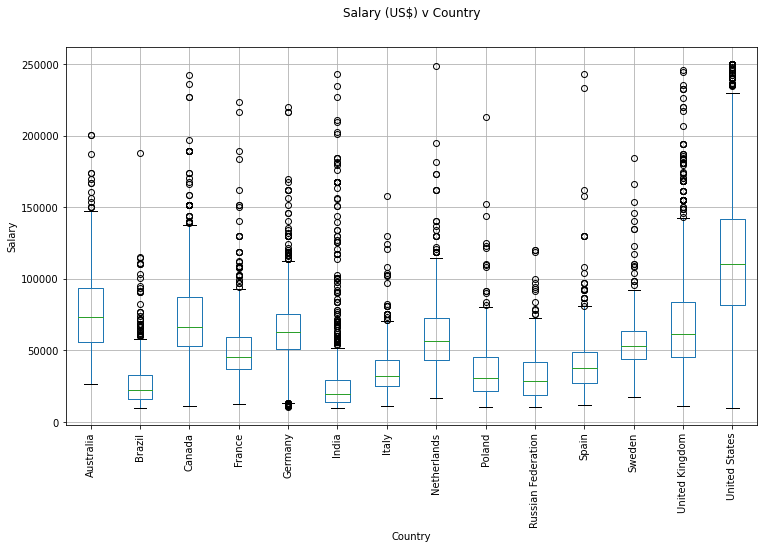

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [15]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [16]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [17]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [18]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [19]:
'''from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_'''

'from sklearn.preprocessing import LabelEncoder\nle_education = LabelEncoder()\ndf[\'EdLevel\'] = le_education.fit_transform(df[\'EdLevel\'])\ndf["EdLevel"].unique()\n#le.classes_'

In [20]:
d={'Bachelor’s degree':1, 'Master’s degree':2, 'Less than a Bachelors':0,
       'Post grad':3}
df['EdLevel'] = df['EdLevel'].map(d)

In [21]:
df['EdLevel']

7        1
9        2
10       1
11       0
12       0
        ..
64113    0
64116    1
64122    0
64127    3
64129    2
Name: EdLevel, Length: 18491, dtype: int64

In [22]:
'''import pandas as pd

# Assuming df is your DataFrame and 'EdLevel' is the column you want to encode
df['EdLevel'] = df['EdLevel'].astype('category')
df['EdLevel'] = df['EdLevel'].cat.codes

# Print the unique encoded values
unique_encoded_values = df["EdLevel"].unique()
print("Encoded Values:", unique_encoded_values)'''

'import pandas as pd\n\n# Assuming df is your DataFrame and \'EdLevel\' is the column you want to encode\ndf[\'EdLevel\'] = df[\'EdLevel\'].astype(\'category\')\ndf[\'EdLevel\'] = df[\'EdLevel\'].cat.codes\n\n# Print the unique encoded values\nunique_encoded_values = df["EdLevel"].unique()\nprint("Encoded Values:", unique_encoded_values)'

In [23]:
'''le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()'''

'le_country = LabelEncoder()\ndf[\'Country\'] = le_country.fit_transform(df[\'Country\'])\ndf["Country"].unique()'

In [24]:
'''import pandas as pd

# Assuming df is your DataFrame and 'Country' is the column you want to encode
df['Country'] = pd.Categorical(df['Country'])
df['Country'] = df['Country'].cat.codes

# Print the unique encoded values
unique_encoded_values = df["Country"].unique()
print("Encoded Values:", unique_encoded_values)'''

'import pandas as pd\n\n# Assuming df is your DataFrame and \'Country\' is the column you want to encode\ndf[\'Country\'] = pd.Categorical(df[\'Country\'])\ndf[\'Country\'] = df[\'Country\'].cat.codes\n\n# Print the unique encoded values\nunique_encoded_values = df["Country"].unique()\nprint("Encoded Values:", unique_encoded_values)'

In [25]:
e={'Other': 0,  
    'United States': 2,
    'India': 1,
    'United Kingdom': 3,
    'Germany': 4,
    'Canada': 5,
    'Brazil': 6,
    'France': 7,
    'Spain': 8,
    'Australia': 9,
    'Netherlands': 10,
    'Poland': 11,
    'Italy': 12,
    'Russian Federation': 13,
    'Sweden': 14 }
df['Country'] =df['Country'].map(e)

In [26]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

<AxesSubplot: >

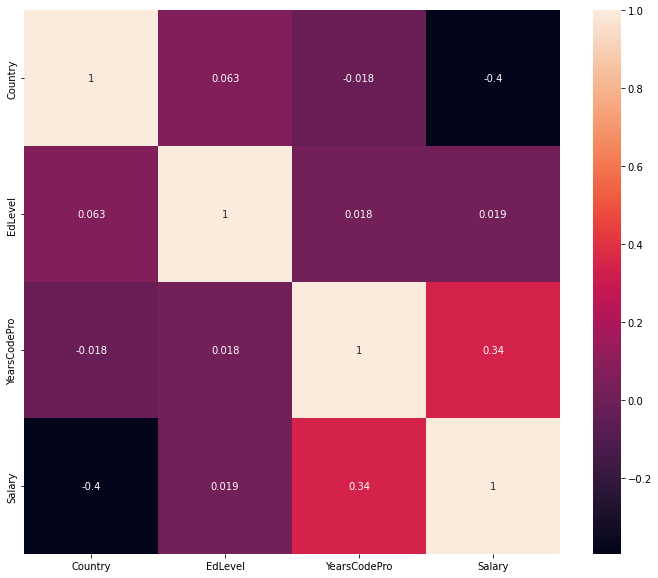

In [27]:
## Check for multicollinearity
import seaborn as sns

plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [28]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
X_train_scaled=scaler.fit_transform(X_train)

In [31]:
X_test_scaled=scaler.transform(X_test)

In [32]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [33]:
X_train_scaled

array([[ 2.59352617, -1.47758857,  1.42522176],
       [ 1.2019792 , -0.21849127,  2.98652861],
       [ 0.64536041,  1.04060602, -0.3963029 ],
       ...,
       [-0.74618655, -1.47758857,  0.12413272],
       [-0.74618655, -0.21849127, -0.5264118 ],
       [ 0.36705102, -0.21849127, -0.91673851]])

In [34]:
X_test_scaled

array([[ 2.03690738,  1.04060602, -0.5264118 ],
       [ 0.08874163, -0.21849127, -1.11190187],
       [ 1.48028859,  1.04060602, -0.91673851],
       ...,
       [ 0.36705102, -0.21849127, -0.3963029 ],
       [-0.74618655, -0.21849127,  0.12413272],
       [ 1.2019792 , -0.21849127,  0.51445943]])

## Box Plots To understand Effect Of Standard Scaler

C:\Users\Gowtham Chandu\AppData\Local\Temp\ipykernel_5388\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

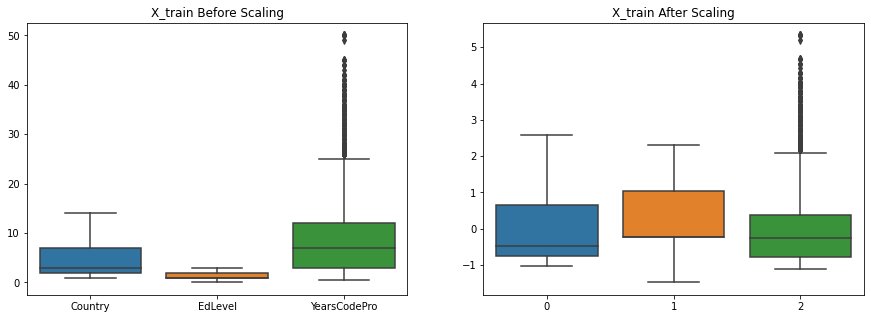

In [35]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

In [36]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [37]:
## print the coefficients and the intercept
print(linear_reg.coef_)

[-18946.61187905   1807.6917679   16003.06843188]


In [38]:
print(linear_reg.intercept_)

77105.35316387237


In [39]:
## on which parameters the model has been trained
linear_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [40]:
y_pred = linear_reg.predict(X_test_scaled)

In [41]:
from sklearn.metrics import r2_score
linear_score=r2_score(y_test,y_pred)
print(linear_score)

0.26380113651605097


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [43]:
error

40539.108079671

In [44]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
y_pred = dec_tree_reg.predict(X_test_scaled)

In [46]:
Dec_tree_score=r2_score(y_test,y_pred)
print(Dec_tree_score)

0.5406904360829232


In [47]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$32,020.59


In [48]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=0)

In [49]:
y_pred = random_forest_reg.predict(X_test_scaled)

In [50]:
random_forest_score=r2_score(y_test,y_pred)
print(random_forest_score)

0.5555546328186209


In [51]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$31,498.21


In [52]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train_scaled,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [53]:
'''regressor = gs.best_estimator_

regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))'''

'regressor = gs.best_estimator_\n\nregressor.fit(X_train_scaled,y_train)\ny_pred = regressor.predict(X_test_scaled)\nerror = np.sqrt(mean_squared_error(y_test, y_pred))\nprint("${:,.02f}".format(error))'

In [54]:
regressor = linear_reg

regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$40,539.11


In [55]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.26380113651605097


In [56]:
X

,Country,EdLevel,YearsCodePro
7,2,1,13.0
9,3,2,4.0
10,3,1,2.0
11,8,0,7.0
12,10,0,20.0
...,...,...,...
64113,2,0,15.0
64116,2,1,6.0
64122,2,0,4.0
64127,2,3,12.0


In [57]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [58]:
'''X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X'''

'X[:, 0] = le_country.transform(X[:,0])\nX[:, 1] = le_education.transform(X[:,1])\nX = X.astype(float)\nX'

In [59]:
import pandas as pd

# Assuming X is your feature matrix
country_mapping = {country: i for i, country in enumerate(np.unique(X[:, 0]))}
education_mapping = {education: i for i, education in enumerate(np.unique(X[:, 1]))}

# Apply the mapping to the respective columns
X[:, 0] = np.vectorize(country_mapping.get)(X[:, 0])
X[:, 1] = np.vectorize(education_mapping.get)(X[:, 1])

# Convert the entire matrix to float
X = X.astype(float)

# Print the modified feature matrix
print(X)


[[ 0.  0. 15.]]


In [60]:
y_pred = regressor.predict(X)
y_pred

array([317151.37964211])

## Pickling The Model file For Deployment

In [61]:
import pickle

In [62]:
data = {"model": regressor, "country_mapping": country_mapping, "education_mapping": education_mapping}
with open('regmodel.pkl', 'wb') as file:
    pickle.dump(data, file)

In [63]:
with open('regmodel.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
country_mapping = data["country_mapping"]
education_mapping = data["education_mapping"]

In [64]:
y_pred = regressor_loaded.predict(X)
y_pred

array([317151.37964211])